# Demo: Clustering for classification problem
In this demo, we will be working on the digit images as same in the demo of digit recognition problem.

# Task 1: Read data

In [2]:
from sklearn import datasets

In [3]:
# Load data
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


In [6]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))
# Normalization 
# Why devided by 16 not 255? max min
X = data/16

## Visualize some data with its label

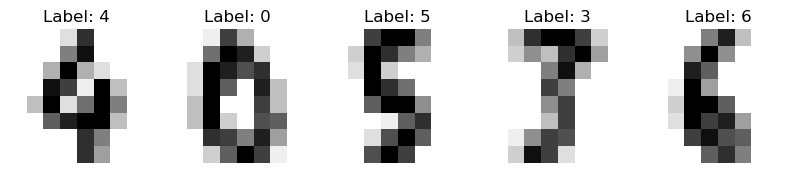

In [4]:
import matplotlib.pyplot as plt

start_index = 100

_,axes = plt.subplots(nrows=1,ncols=5,figsize = (10,3))
for ax, image, label in zip(axes,digits.images[start_index:start_index+5],digits.target[start_index:start_index+5]):
    ax.set_axis_off()
    ax.imshow(image,cmap = plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Label: %i" % label)

# Task 2: Clustering K Means
We only using features in images to clustering without using label information from dataset 
Steps:
-   Randomly select K datapoints i.e. K number of clusters
-   Calculate the Euclidean Distance of each datapoint from centroid
    -   Datapoint closer to a cluster is assigned to that cluster
-   Recalculate the centroids by taking the evarage of datapoints
-   Reassign datapoints to new clusters
-   Repeat S2 and S3 till the position of records/datapoints from their previous clusters remain same


In [7]:
# Initialize K-means for 10 clusters (0-9 digit)
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=10,random_state=0)
# Return Kmeans clustering on data for 1797 records and 64 features
clusters = k_means.fit_predict(X)
center_cluster = k_means.cluster_centers_

/Users/user/anaconda3/envs/ASINK_Demo/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


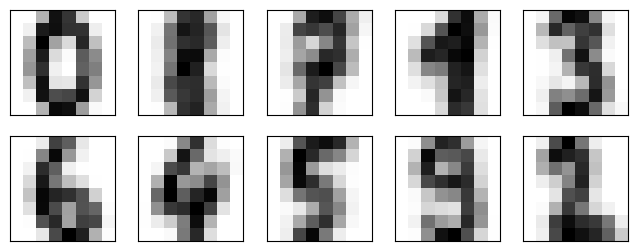

In [8]:
# Visulize center of each cluster
fig, ax = plt.subplots(2, 5, figsize = (8,3)) #Create a figure and a set of subplots( 2 rows and 5 columns)
centers = k_means.cluster_centers_.reshape(10,8,8) 

for axi, center in zip(ax.flat, centers): 
    axi.set(xticks = [], yticks = [])
    axi.imshow(center, interpolation='nearest',cmap = plt.cm.binary) 

In [9]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(clusters) # blank labels 
print(f"The labels are : {labels}")
print(f"\nThe size of labels is : {labels.shape}")
print("The mask values are : ")
for i in range(10): 
    mask = (clusters == i) 
    #if a specific digit belongs to/equivalent a specific cluster then its True else False
    print(mask)
    labels[mask] = mode(digits.target[mask])[0]

The labels are : [0 0 0 ... 0 0 0]

The size of labels is : (1797,)
The mask values are : 
[ True False False ... False False False]
[False  True  True ...  True False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False  True  True]
[False False False ... False False False]


In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix
#if a specific digit belongs to/equivalent a specific cluster then acuracy is 1 else 0
accuracy = "{:.2f}".format(accuracy_score(digits.target, labels)*100)
print(f"Accuracy: {accuracy}%")

Accuracy: 79.19%


In [12]:
from sklearn import metrics
print(f"Classification report for classifier by clustering:\n"
      f"{metrics.classification_report(digits.target,labels)}\n")

Classification report for classifier by clustering:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.50      0.85      0.63       182
           2       0.85      0.84      0.84       177
           3       0.87      0.84      0.85       183
           4       0.98      0.91      0.94       181
           5       0.91      0.75      0.82       182
           6       0.97      0.98      0.98       181
           7       0.84      0.97      0.90       179
           8       0.00      0.00      0.00       174
           9       0.56      0.77      0.65       180

    accuracy                           0.79      1797
   macro avg       0.75      0.79      0.76      1797
weighted avg       0.75      0.79      0.76      1797




/Users/user/anaconda3/envs/ASINK_Demo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/anaconda3/envs/ASINK_Demo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/anaconda3/envs/ASINK_Demo/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Confusion matrix:
[[176   0   0   0   2   0   0   0   0   0]
 [  0 154  24   1   0   1   2   0   0   0]
 [  1  10 148  13   0   0   0   3   0   2]
 [  0   7   0 154   0   2   0   7   0  13]
 [  0   5   0   0 165   0   0  11   0   0]
 [  0   0   0   2   2 136   1   0   0  41]
 [  1   3   0   0   0   0 177   0   0   0]
 [  0   4   0   0   0   1   0 174   0   0]
 [  0 106   3   2   0   4   2   5   0  52]
 [  0  21   0   6   0   6   0   8   0 139]]


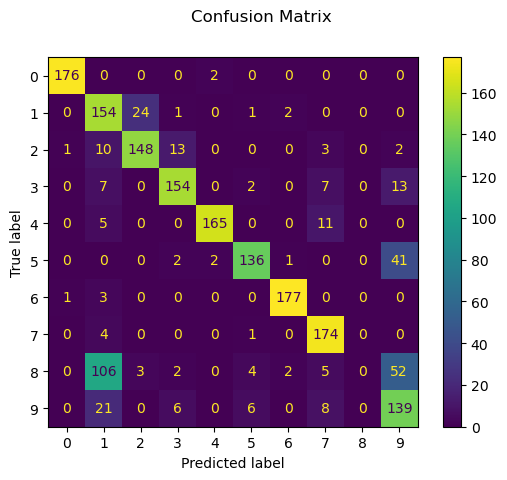

In [13]:

# Confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(digits.target,labels)

disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()